In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist


In [11]:

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
selected_indices = [0, 3, 6]
train_images, train_labels = train_images[np.isin(train_labels, selected_indices)], train_labels[np.isin(train_labels, selected_indices)]
test_images, test_labels = test_images[np.isin(test_labels, selected_indices)], test_labels[np.isin(test_labels, selected_indices)]


In [12]:

train_images = train_images / 255.0
test_images = test_images / 255.0


In [13]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [14]:
learning_rates = [0.001, 0.01, 0.1]
best_lr = 0
best_accuracy = 0

for lr in learning_rates:
    model.compile(optimizer=keras.optimizers.Adam(lr=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.fit(train_images, train_labels, epochs=10, validation_split=0.2, verbose=0)
    
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    print(f"Learning rate: {lr}, Test Accuracy: {test_accuracy}")
    
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_lr = lr

print(f"Best Learning Rate: {best_lr}")


Learning rate: 0.001, Test Accuracy: 0.8686666488647461


Learning rate: 0.01, Test Accuracy: 0.8723333477973938
Learning rate: 0.1, Test Accuracy: 0.8799999952316284
Best Learning Rate: 0.1


In [15]:
model.compile(optimizer=keras.optimizers.Adam(lr=best_lr),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, validation_split=0.2)


Epoch 1/10
450/450 [==============================] - 1s 1ms/step - loss: 0.1344 - accuracy: 0.9482 - val_loss: 0.3700 - val_accuracy: 0.8867
Epoch 2/10
450/450 [==============================] - 0s 887us/step - loss: 0.1322 - accuracy: 0.9484 - val_loss: 0.3640 - val_accuracy: 0.8814
Epoch 3/10
450/450 [==============================] - 0s 876us/step - loss: 0.1282 - accuracy: 0.9499 - val_loss: 0.3413 - val_accuracy: 0.8869
Epoch 4/10
450/450 [==============================] - 0s 885us/step - loss: 0.1253 - accuracy: 0.9522 - val_loss: 0.3539 - val_accuracy: 0.8817
Epoch 5/10
450/450 [==============================] - 0s 927us/step - loss: 0.1168 - accuracy: 0.9549 - val_loss: 0.3447 - val_accuracy: 0.8844
Epoch 6/10
450/450 [==============================] - 0s 876us/step - loss: 0.1112 - accuracy: 0.9564 - val_loss: 0.3679 - val_accuracy: 0.8833
Epoch 7/10
450/450 [==============================] - 0s 883us/step - loss: 0.1127 - accuracy: 0.9557 - val_loss: 0.3900 - val_accuracy: 0

In [16]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:\n", cm)


94/94 [==============================] - 0s 495us/step
Confusion Matrix:
 [[822  15 163]
 [ 27 921  52]
 [ 96  28 876]]


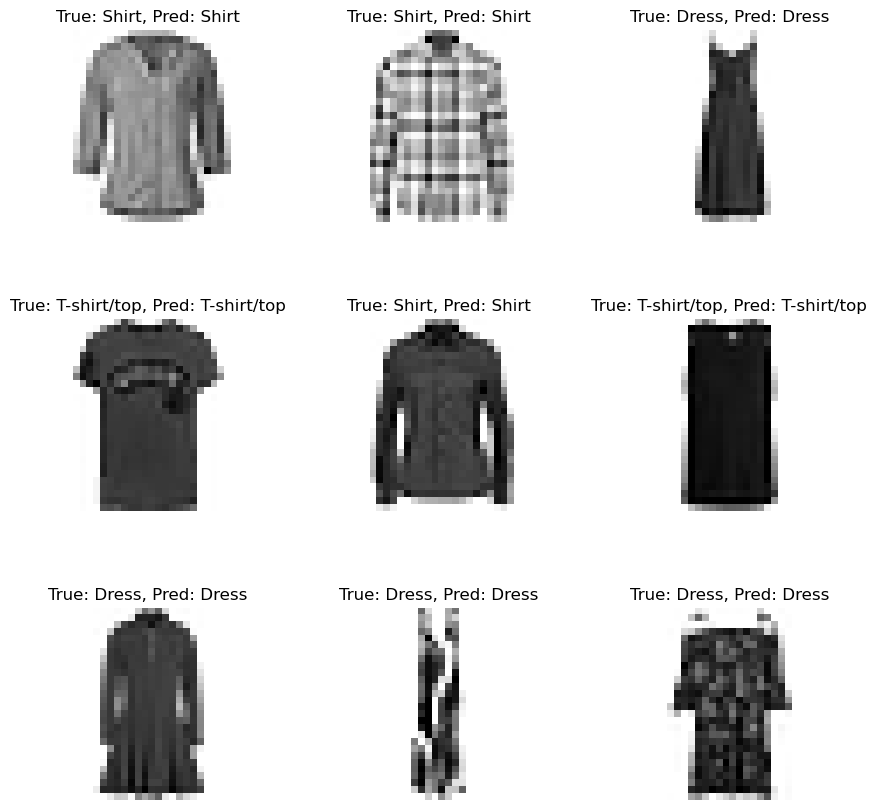

In [17]:
def plot_images(images, labels, predictions=None):
    
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    
    selected_class_names = [class_names[i] for i in selected_indices]

    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    axes = axes.ravel()

    for i, ax in enumerate(axes):
        ax.imshow(images[i], cmap=plt.cm.binary)
        true_label = selected_class_names[selected_indices.index(labels[i])]
        if predictions is None:
            title = f"True: {true_label}"
        else:
            pred_label = selected_class_names[selected_indices.index(predictions[i])]
            title = f"True: {true_label}, Pred: {pred_label}"
        ax.set_title(title)
        ax.axis('off')

    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.show()

sample_images, sample_labels = test_images[:9], test_labels[:9]
sample_predictions = predicted_labels[:9]

plot_images(sample_images, sample_labels, sample_predictions)

